In [17]:
#RFV not useful precipitation, use PRCP, RFV has all zero values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cm as cm

#dhy = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.DHY', delimiter=r'\s+', skiprows=8)
#sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
sad= pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_exdata - Guinea pig/TxtInOut/SITE14.SAD', delimiter=r'\s+', skiprows=9)
#dhy.columns=dhy.columns.str.strip()
sad.columns=sad.columns.str.strip()
sad.head()

,#,ID,Y,M,D,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,SNOF,SNOM,PET,ET,EP,Q,SSF,PRK,QDR,IRGA,QIN,TLGE,TLGW,TLGQ,TLGF,EPP,RSQI,RSQO,RSEV,RSLK,DPRK,RSSF,QFP,QRF,RFIC,RSBK,CPVH,CPVV,RFV,PSOQ,IRDL,WYLD,SW,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT
0,1,13,1997,1,1,SPAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0897,0.6350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,0.0,0.0,0.0,2.3791,2.3791,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3791,108.9466,0.0,0.0,0.0,0.0,0.0,0.0,8.7548,96.6785,233.8347,99.8229,0.0,0.0,0.0,108.9466,75.0,452.4188,0.01,0.0662,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1,2,2,1997,1,1,CORN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0832,0.6308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0069,0.0,0.0,0.0,0.0,2.3791,2.3791,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3791,99.7771,0.0,0.0,0.0,0.0,0.0,0.0,8.0871,124.5790,296.1708,110.2562,0.0,0.0,0.0,99.7771,75.0,452.4188,0.00,0.0496,0.0,0.0,0.0,0.0,0.0,0.0,0.000011275.5049,NaN
2,3,1,1997,1,1,SPAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0827,0.6307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0069,0.0,0.0,0.0,0.0,2.3791,2.3791,0.2434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3791,99.7773,0.0,0.0,0.0,0.0,0.0,0.0,8.0871,124.5790,296.1708,110.2562,0.0,0.0,0.0,99.7773,75.0,452.4187,0.01,0.0496,0.0,0.0,0.0,0.0,0.0,0.0,0.000011275.5049,NaN
3,4,6,1997,1,1,SPAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0860,0.6339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,0.0,0.0,0.0,2.3791,2.3791,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3791,108.9477,0.0,0.0,0.0,0.0,0.0,0.0,8.7550,96.6784,233.8347,99.8229,0.0,0.0,0.0,108.9477,75.0,452.4187,0.01,0.0662,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
4,1,13,1997,1,2,SPAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9351,0.3945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0065,0.0,0.0,0.0,0.0,2.1527,2.1527,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1527,108.5521,0.0,0.0,0.0,0.0,0.0,0.0,11.1399,95.7328,233.8905,99.8169,0.0,0.0,0.0,108.5521,75.0,409.3654,0.01,0.0658,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

      #  ID  Year  Month  Day  CPNM     HUI     LAI      RD      RW    BIOM  \
4376  1  13  1999     12   31  SPAS  0.4957  1.0293  1.8293  2.1345  6.3989   

         STL    CPHT      STD    STDL      WS      NS   PS   KS      TS   AS  \
4376  4.2644  0.2733  19.5548  1.1094  0.9914  0.0239  1.0  1.0  0.2839  1.0   

      SALT     REG  PRCP  SNOF  SNOM     PET      ET     EP    Q  SSF  PRK  \
4376   1.0  0.0239   0.0   0.0   0.0  2.3442  0.8044  0.804  0.0  0.0  0.0   

      QDR  IRGA  QIN  TLGE  TLGW  TLGQ  TLGF     EPP  RSQI  RSQO  RSEV  RSLK  \
4376  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.8189   0.0   0.0   0.0   0.0   

      DPRK  RSSF  QFP  QRF  RFIC  RSBK  CPVH  CPVV  RFV  PSOQ  IRDL  WYLD  \
4376   0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   

           SW  RSYO  RSYD  QRP  YRP  YNRP  YPRP    ZNH3  ZNO3      ZPML  ZSK  \
4376  98.8465   0.0   0.0  0.0  0.0   0.0   0.0  3.3529   0.0  163.6466  0.0   

          UNM      UPM      UKM     RZSW  WTBL

C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['INFLOW']=sub_sad['PRCP']
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

-404.7769999085915
      #  ID  Year  Month  Day  CPNM     HUI     LAI   RD      RW    BIOM  \
4378  3   1  1999     12   31  SPAS  0.4961  0.9823  2.0  2.2625  6.7437   

         STL   CPHT     STD    STDL      WS      NS   PS   KS      TS   AS  \
4378  4.4812  0.253  20.605  1.1561  0.9992  0.0275  1.0  1.0  0.2839  1.0   

        SALT     REG  PRCP  SNOF  SNOM     PET      ET      EP    Q  SSF  PRK  \
4378  0.9994  0.0275   0.0   0.0   0.0  2.3363  0.7715  0.7713  0.0  0.0  0.0   

      QDR  IRGA  QIN  TLGE  TLGW  TLGQ  TLGF     EPP  RSQI  RSQO  RSEV  RSLK  \
4378  0.0   0.0  0.0   0.0   0.0   0.0   0.0  0.7797   0.0   0.0   0.0   0.0   

      DPRK  RSSF  QFP  QRF  RFIC  RSBK  CPVH  CPVV  RFV  PSOQ  IRDL  WYLD  \
4378   0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   

           SW  RSYO  RSYD  QRP  YRP  YNRP  YPRP    ZNH3    ZNO3      ZPML  \
4378  92.0324   0.0   0.0  0.0  0.0   0.0   0.0  2.3538  0.0001  214.2946   

      ZSK      UNM      UPM      UKM 

C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['INFLOW']=sub_sad['PRCP']
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
C:\Users\shahi\AppData\Local\Temp\ipykernel_31060\1120695502.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

-413.1800213893957


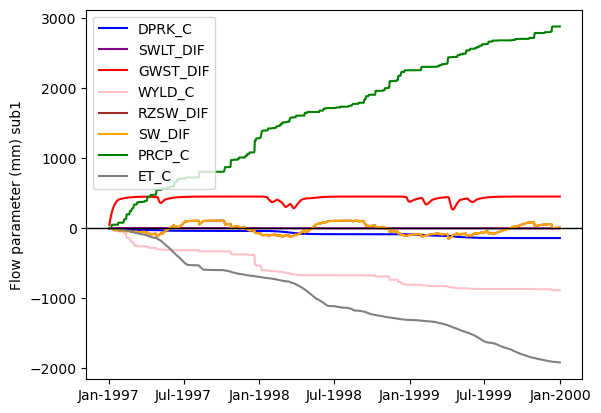

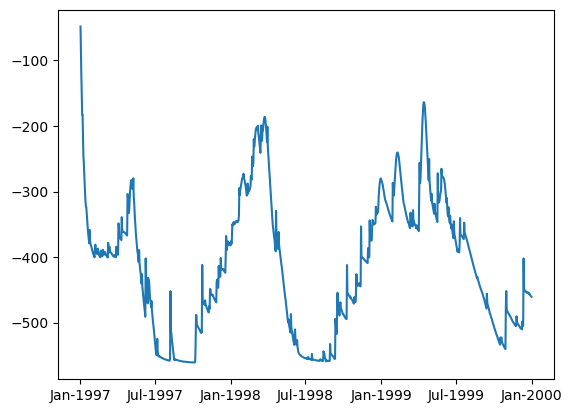

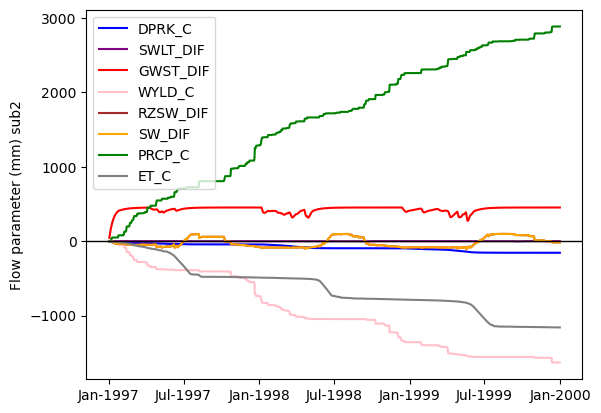

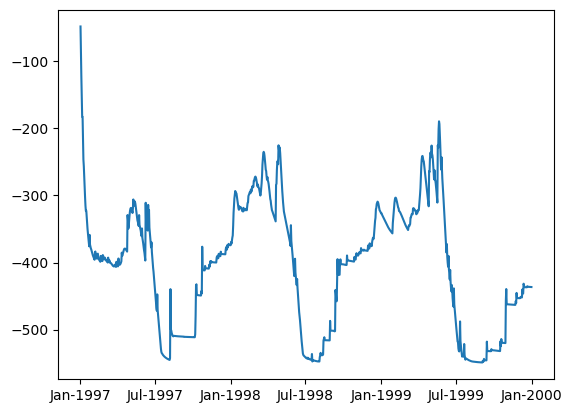

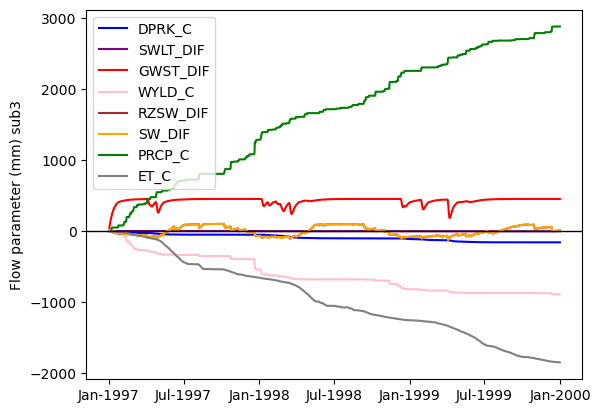

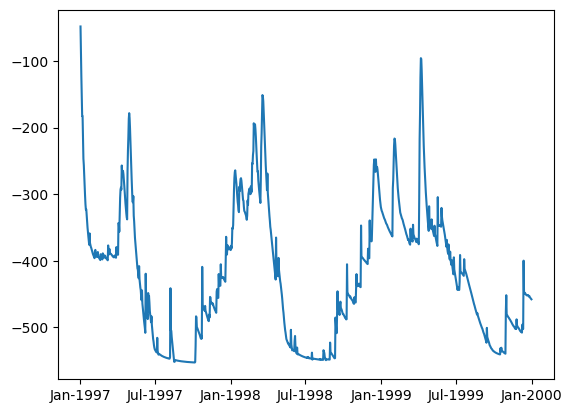

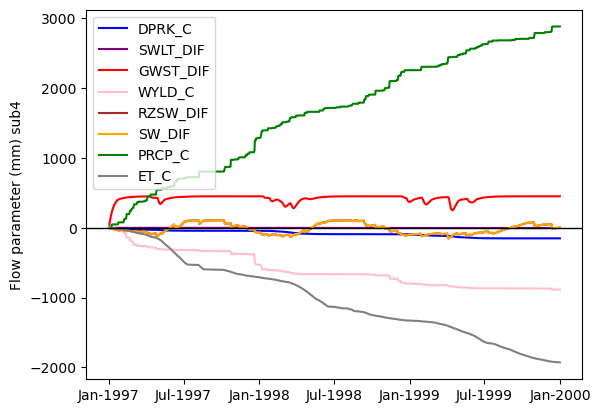

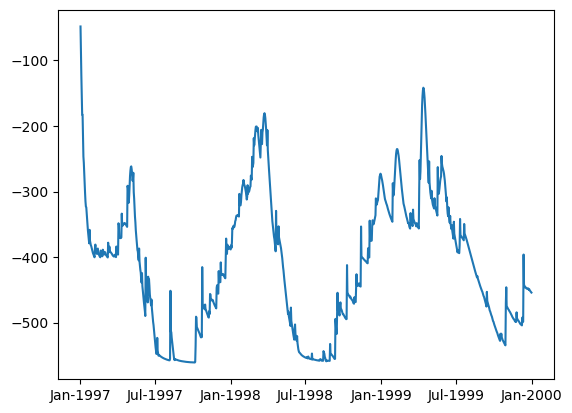

In [19]:
for n in range(1,5):
    sub_sad = sad[sad['#']==n]
    sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
    sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
    # sub_sad['RFV_C']=sub_sad['RFV'].cumsum()
    # sub_sad['PRCP_C']=sub_sad['PRCP'].cumsum()
    # sub_sad['WYLD_C']=sub_sad['WYLD'].cumsum()
    # sub_sad['INFLOW_C']=(sub_sad['IRGA']+sub_sad['DPRK']+sub_sad['RSSF']+sub_sad['PSOQ']+sub_sad['GWST']+sub_sad['SWLT']+sub_sad['SNO']).cumsum()
    # sub_sad['OUTFLOW_C']=(sub_sad['ET']+sub_sad['SSF']+sub_sad['PRK']).cumsum()*(-1)
    
    
    # inflow_param = {'PRCP','SNOM', 'SNOF', 'PET','ET','EP','Q','SSF','SSF','PRK',
    #                'QDR','IRGA','QIN','TLGE','TLGW','TLGQ','TLGF','EPP','RSQI','RSQO','RSEV',
    #                'RSLK','DPRK','RSSF','QFP','QRF','RFIC','RSBK','CPVH','CPVV','RFV','PSOQ',
    #                'IRDL','WYLD','RZSW'}
    inflow_param= {'PRCP'}
    outflow_param = {'ET','WYLD','DPRK'}
    #sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
    for var in inflow_param:
        sub_sad[f'{var}_C']=sub_sad[var].cumsum()
    for var in outflow_param:
        sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
    # sub_sad['OUTFLOW_C']=sub_sad[]
    #sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
    #Storage changes
    storage_param={'SW','GWST','SWLT','SNO','RZSW'}
    for var in storage_param:
         sub_sad[var] = pd.to_numeric(sub_sad[var], errors='coerce')
         sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()*(-1) #initial-final storage, so multiplied by -1

    pd.set_option('display.max_columns', None)
    print(sub_sad.tail(1))
    
    fig,ax=plt.subplots()
    n_lines = len(sub_sad.columns[84:])
    #colors = cm.get_cmap('tab20',n_lines)
    colors=['blue','purple','red','pink','brown','orange','green','grey']
    var={'PRCP_C','ET_C','WYLD_C','DPRK_C','SW_DIF','RZSW_DIF','GWST_DIF','SWLT_DIF'}
    #for i, var in enumerate(sub_sad.columns[84:]):
    for i,j in enumerate(var):
        plt.plot(sub_sad['DATE'], sub_sad[j], color=colors[i], label=j)
        plt.errorbar(sub_sad['DATE'], sub_sad[j], ls="None")
    #plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
    plt.xticks
    plt.axhline(y=0, linewidth=1, color='k')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.ylabel(f"Flow parameter (mm) sub{n}")
    ax.legend()
    plt.show

    sub_sad['INFLOW']=sub_sad['PRCP']
    sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
    sub_sad['DIFF_STOR']= sub_sad['SW_DIF']+sub_sad['SWLT_DIF']+sub_sad['GWST_DIF']
    sub_sad['RESIDUAL']=sub_sad['INFLOW']-sub_sad['OUTFLOW']-sub_sad['DIFF_STOR']
    print(sub_sad['RESIDUAL'].mean())
    fig1,ax1=plt.subplots()
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.plot(sub_sad['DATE'], sub_sad['RESIDUAL'], label="residual")
    plt.show
    
#pd.set_option('display.max_columns', None)
#sub_sad.tail(1)

In [554]:

sub_sad.tail(1)


C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\2934660665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[var] = pd.to_numeric(sub_sad[var], errors='coerce')
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\2934660665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()*(-1) #initial-final storage, so multiplied by -1
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\2934660665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,#,ID,Year,Month,Day,CPNM,HUI,LAI,RD,RW,BIOM,STL,CPHT,STD,STDL,WS,NS,PS,KS,TS,AS,SALT,REG,PRCP,ET,Q,CN,SSF,PRK,IRGA,DPRK,RSSF,USLE,MUSL,MUSS,YN,QN,SSFN,PRKN,DN,AVOL,YP,RSPC,QC,YC,PSOQ,PSON,PSOP,WYLD,SW,QI,QARS,DN2,RSQI,RSQO,RSEV,RSYI,RSYO,RSYD,QRP,YRP,YNRP,YPRP,ZNH3,ZNO3,ZPML,ZSK,UNM,UPM,UKM,RZSW,WTBL,GWST,STDO,RSD,RSVQ,RSVY,RSSA,SWLT,SNO,RSDM,GWSN,ZSLT,DATE,PRCP_C,DPRK_C,ET_C,WYLD_C,SW_DIF,SWLT_DIF,GWST_DIF,RZSW_DIF,SNO_DIF
153347,3,21,1999,12,31,LCWW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1768,0.0,49.0531,0.0,0.0,0.0,0.0011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0036,0.0,6.0696,0.0,0.0,0.0,0.0,0.0,0.0,61.9404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.844,3.7629,499.4545,41.5098,62.8903,5.6118,64.6099,61.9404,75.000051775.2734,0.0,1.1474,0.0,0.0,0.0,0.0,0.0,0.0,1.299,643.6733,NaN,1999-12-31,10021.2,-1358.5828,-13019.8448,-1028.9238,75.1183,-2.775558e-17,1.355253e-20,75.1183,-0.0


<function matplotlib.pyplot.show(close=None, block=None)>

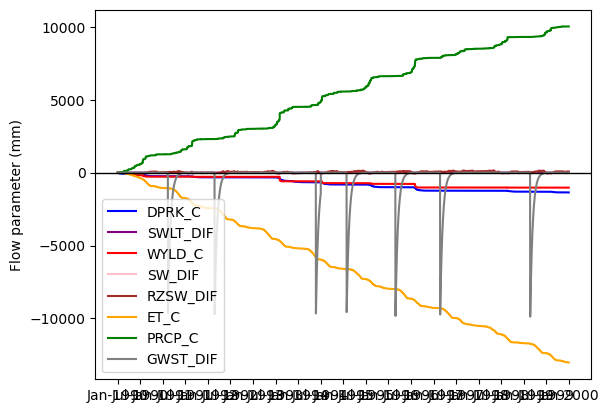

In [555]:
import matplotlib.cm as cm
fig,ax=plt.subplots()
n_lines = len(sub_sad.columns[84:])
#colors = cm.get_cmap('tab20',n_lines)
colors=['blue','purple','red','pink','brown','orange','green','grey']
var={'PRCP_C','ET_C','WYLD_C','DPRK_C','SW_DIF','RZSW_DIF','GWST_DIF','SWLT_DIF'}
#for i, var in enumerate(sub_sad.columns[84:]):
for i,j in enumerate(var):
    plt.plot(sub_sad['DATE'], sub_sad[j], color=colors[i], label=j)
    plt.errorbar(sub_sad['DATE'], sub_sad[j], ls="None")
#plt.plot(sub_sad['DATE'], sub_sad['PRCP_C'])
plt.xticks
plt.axhline(y=0, linewidth=1, color='k')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.ylabel("Flow parameter (mm)")
ax.legend()
plt.show

347.19603345200596


C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\1392118325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['INFLOW']=sub_sad['PRCP']
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\1392118325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\1392118325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

<function matplotlib.pyplot.show(close=None, block=None)>

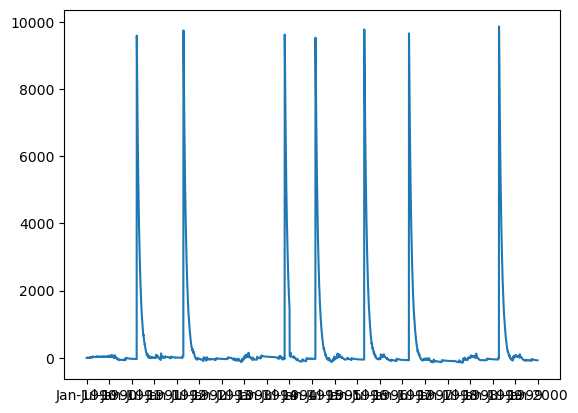

In [556]:
sub_sad['INFLOW']=sub_sad['PRCP']
sub_sad['OUTFLOW']=sub_sad['ET']+sub_sad['WYLD']+sub_sad['DPRK']
sub_sad['DIFF_STOR']= sub_sad['SW_DIF']+sub_sad['SWLT_DIF']+sub_sad['GWST_DIF']
sub_sad['RESIDUAL']=sub_sad['INFLOW']-sub_sad['OUTFLOW']-sub_sad['DIFF_STOR']
print(sub_sad['RESIDUAL'].mean())
fig1,ax1=plt.subplots()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.plot(sub_sad['DATE'], sub_sad['RESIDUAL'], label="residual")
plt.show

In [557]:
inflow = {'PRCP','SNOF','SNOM','IRGA','QIN', 'RSQI', 'RSSF','RFV','PSOQ','RFIC'}
outflow = {'PET','ET','EP','Q','SSF','PRK','QDR','TLGE','TLGW', 'TLGQ','TLGF','EPP',
                 'RSQO','RSLK','DPRK','QFP','QRF','CPVH','CPVV','IRDL','WYLD'}
storage = {'RSEV','RSBK','SW','RZSW','GWST','RSVQ','SWLT','SNO'}

sub_sad = sad[sad['#']==1]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])

#sub_sad['INFLOW_C']=sub_sad['PRCP']+sub_sad['SNOF']+sub_sad['SNOM']+sub_sad['PRK']
for var in inflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum()
for var in outflow:
    sub_sad[f'{var}_C']=sub_sad[var].cumsum() * (-1)
for var in storage:
     sub_sad[f'{var}_DIF']=sub_sad[var].diff().cumsum()
# sub_sad['OUTFLOW_C']=sub_sad[]
#sub_sad['Q_C']=sub_sad['Q'].cumsum() * (-1)
pd.set_option('display.max_columns', None)
sub_sad.tail(1)

C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['DATE'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
C:\Users\shahi\AppData\Local\Temp\ipykernel_14976\4049812197.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

KeyError: 'RFIC'